About this file
Pregnancies     : Number of times pregnant
Glucose         : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure   : Diastolic blood pressure (mm Hg)
SkinThickness   : Triceps skin fold thickness (mm)
Insulin         : 2-Hour serum insulin (mu U/ml)
BMI             : Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age             : Age (years)
Outcome         : Class variable (0 or 1)

CONTEXT
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases of India

## Logistic Reggression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## Load and Check Dataset

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df=diabetes

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#import missingno as msno
#msno.bar(df)
#plt.show

## EDA

In [8]:
def plot_hist(df,feature):
    plt.hist(df[feature], bins = 50)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(feature))
    plt.show()

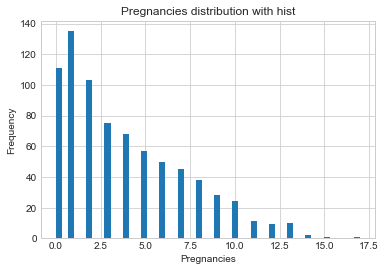

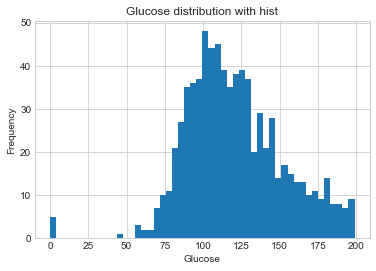

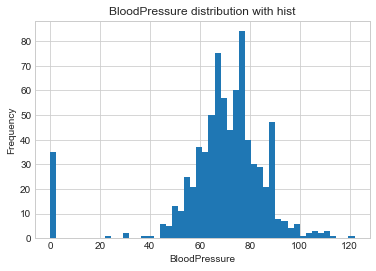

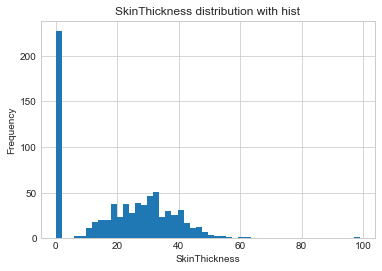

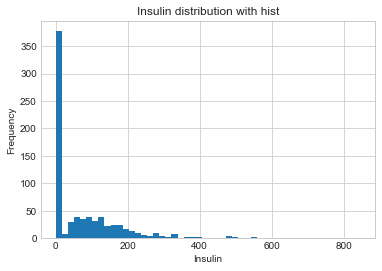

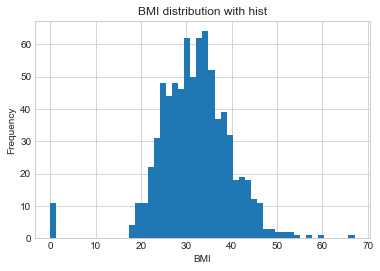

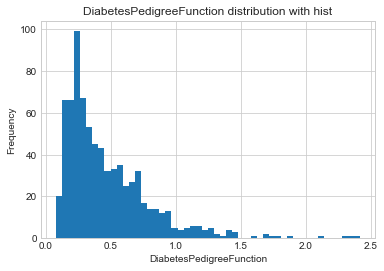

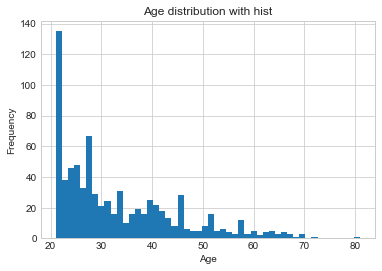

In [9]:
numericVar = df.columns[:-1]
for n in numericVar:
    plot_hist(df,n)

    * First 6 features has invalid values   
      There are many ZEROS in them,  they correspond = NaN values. Let see the situation in detail

In [10]:
#Define the number of ZERO s and their percentage
def ZEROs(df):
    print("               # of ZEROs  \t Length \t  Percent "  )
    print("------------------------------------------------------"  )

    for i in range(6) :
        feature=df[df.columns[i]]
        ZeroSum=(feature==0).sum()
        Percent=int(round((ZeroSum/(len(feature)))*100))
        print(df.columns[i], "\t:", ZeroSum , "\t\t:", len(feature), "\t \t:", Percent,"% "  )


In [11]:
ZEROs(df)

               # of ZEROs  	 Length 	  Percent 
------------------------------------------------------
Pregnancies 	: 111 		: 768 	 	: 14 % 
Glucose 	: 5 		: 768 	 	: 1 % 
BloodPressure 	: 35 		: 768 	 	: 5 % 
SkinThickness 	: 227 		: 768 	 	: 30 % 
Insulin 	: 374 		: 768 	 	: 49 % 
BMI 	: 11 		: 768 	 	: 1 % 


    * Half of the Insuline records are invalid, so high.
    Lets change all the ZERO s to their features medians

In [12]:
# Defining X and y
diabetes = pd.read_csv("diabetes.csv")
df=diabetes
X = df.iloc[:,:-1]   # Dependants
y = df.iloc[:, -1]   # Outcome


In [13]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='median')

X =imputer.fit_transform(X)    # it transform it as an array
X = pd.DataFrame(X,columns=df.columns[:-1])     # Needs to be made as DataFrame again
df=pd.concat([X,y],axis=1)
df2=df  # ıt xill be used later in KNN 

In [14]:
ZEROs(df)

               # of ZEROs  	 Length 	  Percent 
------------------------------------------------------
Pregnancies 	: 0 		: 768 	 	: 0 % 
Glucose 	: 0 		: 768 	 	: 0 % 
BloodPressure 	: 0 		: 768 	 	: 0 % 
SkinThickness 	: 0 		: 768 	 	: 0 % 
Insulin 	: 0 		: 768 	 	: 0 % 
BMI 	: 0 		: 768 	 	: 0 % 


    * We are free from zeros anymore. Lets continue to investigate the features

In [15]:
pd.options.display.float_format = "{:,.0f}".format
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,34,1,50,1
1,1,85,66,29,125,27,0,31,0
2,8,183,64,29,125,23,1,32,1
3,1,89,66,23,94,28,0,21,0
4,4,137,40,35,168,43,2,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,33,0,63,0
764,2,122,70,27,125,37,0,27,0
765,5,121,72,23,112,26,0,30,0
766,1,126,60,29,125,30,0,47,1


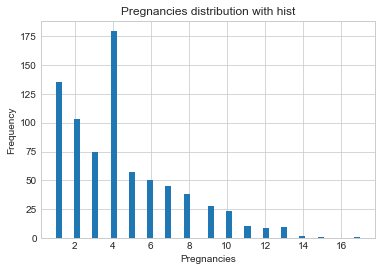

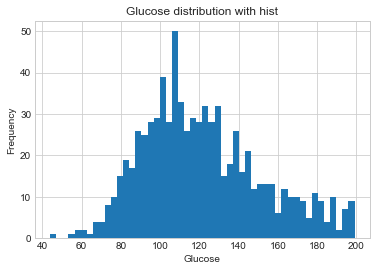

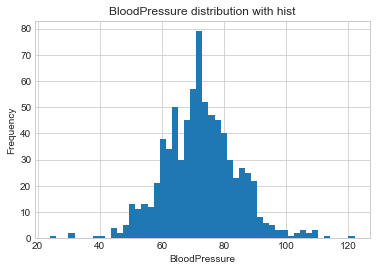

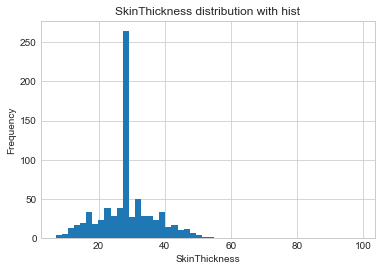

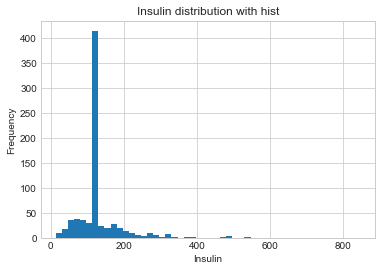

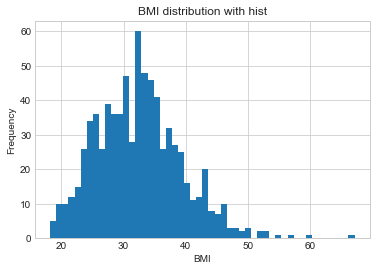

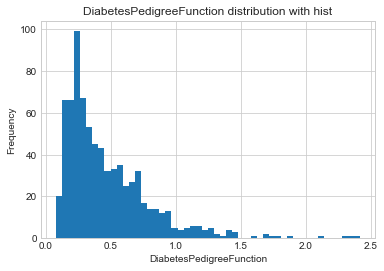

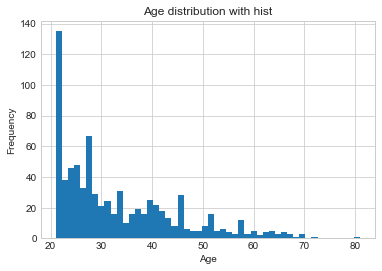

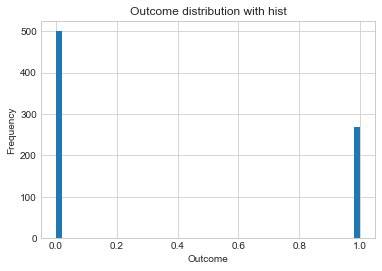

In [16]:
numericVar = df
for n in numericVar:
    plot_hist(df,n)

In [17]:
#pd.options.display.float_format = "{:,.0f}".format
round(df.describe(),1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768,768,768,768,768,768,768,768,768
mean,4,122,72,29,141,32,0,33,0
std,3,30,12,9,86,7,0,12,0
min,1,44,24,7,14,18,0,21,0
25%,2,100,64,25,122,28,0,24,0
50%,4,117,72,29,125,32,0,29,0
75%,6,140,80,32,127,37,1,41,1
max,17,199,122,99,846,67,2,81,1


## Outlier Detection

In [18]:
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile Q1
        Q1 = np.percentile(df[c], 25)
        # 3st quartile Q3
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [19]:
df.loc[detect_outliers(df, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
125,1,88,30,42,99,55,0,26,1
177,4,129,110,46,130,67,0,26,1
662,8,167,106,46,231,38,0,43,1
39,4,111,72,47,207,37,1,56,1
120,4,162,76,56,100,53,1,25,1
370,3,173,82,48,465,38,2,25,1
445,4,180,78,63,14,59,2,25,1


In [20]:
# drop outliers
df = df.drop(detect_outliers(df, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']), axis = 0).reset_index(drop= True)

    * We will try both,  droping and not  

## Visualization

Correleations

In [21]:
list1 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

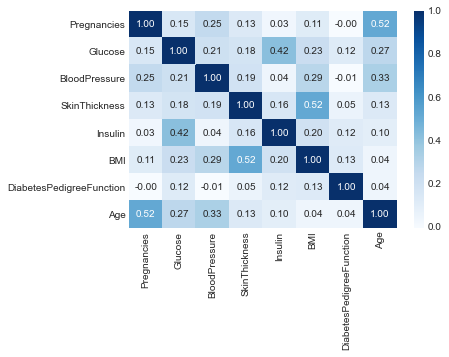

In [22]:
sns.heatmap(df[list1].corr(), annot = True, cmap='Blues', fmt = ".2f")
plt.show()

    * No meaningful inter correlation 

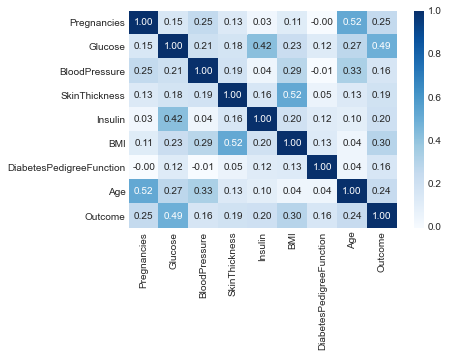

In [23]:
sns.heatmap(df.corr(), annot = True, cmap='Blues', fmt = ".2f")
plt.show()

    * The most correlation with depandant comes from Glucose:0.49 

## Outliers and skew check

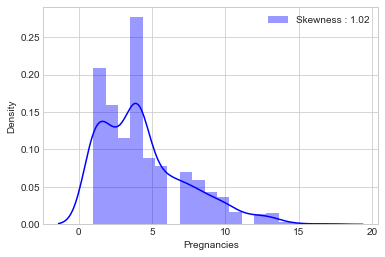

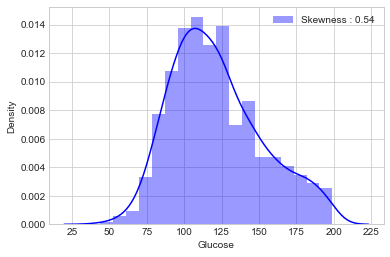

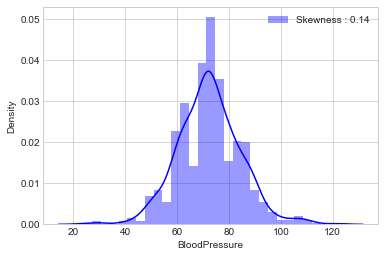

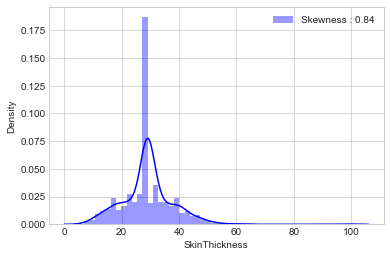

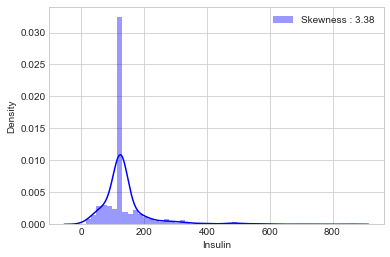

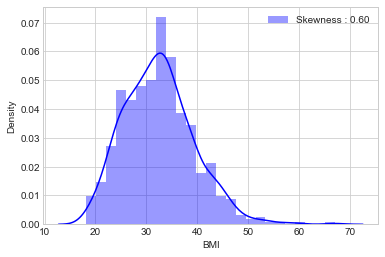

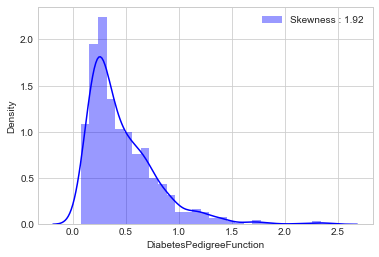

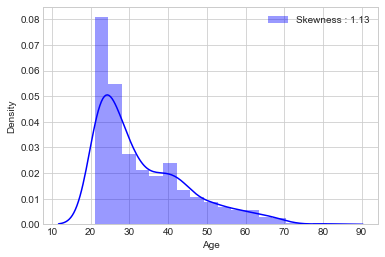

In [24]:
x=X
for i in x:
    g = sns.distplot(x[i], color = "b", label = "Skewness : %.2f"%(x[i].skew()))
    g = g.legend(loc = "best")
    plt.show()

## Feature comparasion with dependant "Outcome"

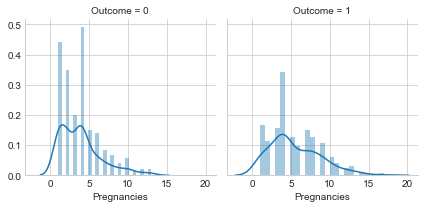

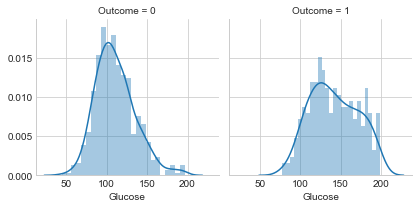

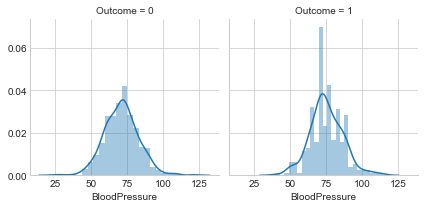

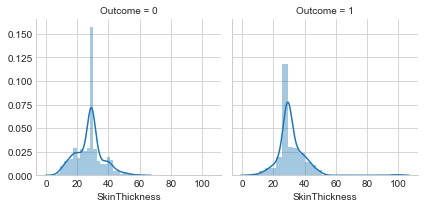

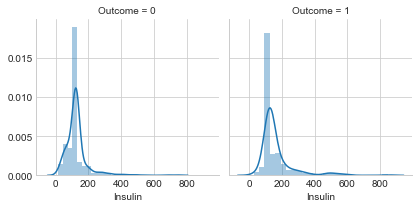

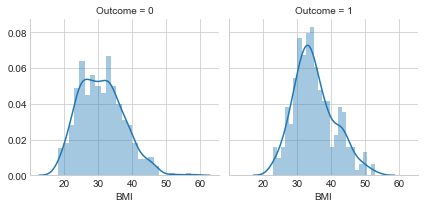

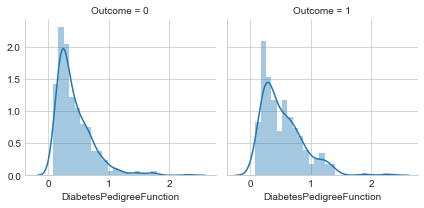

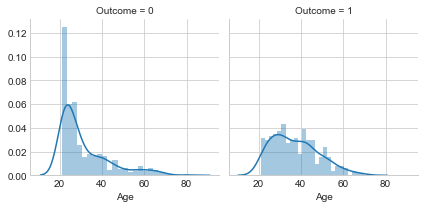

In [25]:
for i in X:
    g = sns.FacetGrid(df, col = "Outcome")
    g.map(sns.distplot, i, bins= 25)        
    plt.show()

    * When the shapes are more unfamilar, it shows the feature have  more correlation 

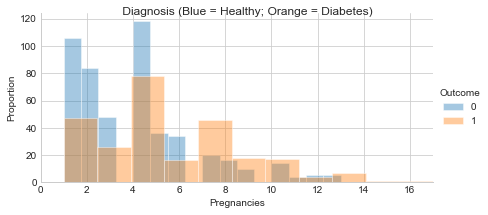

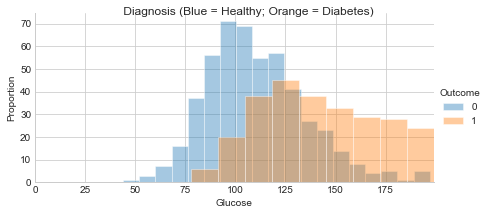

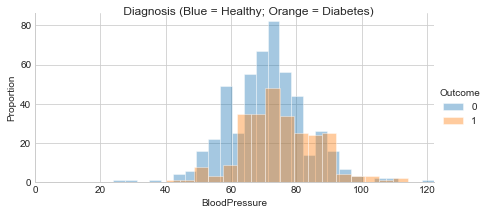

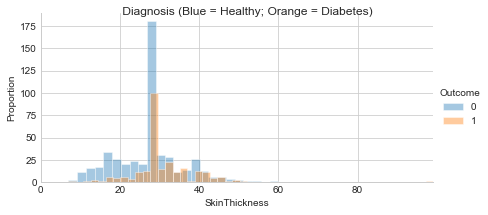

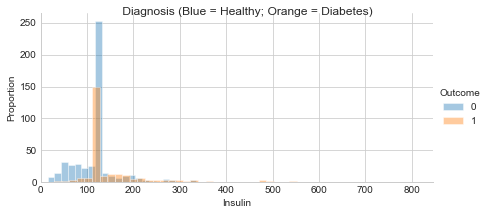

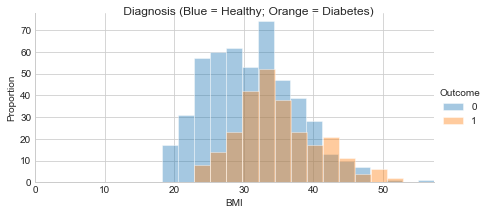

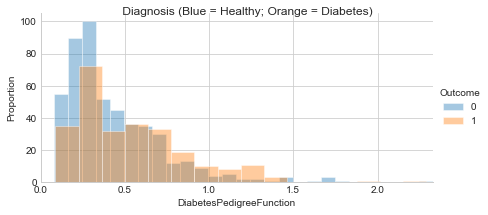

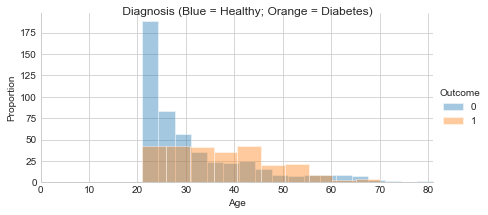

In [26]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.distplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()
for i in X:
    plotHistogram(df,"Outcome",i,' Diagnosis (Blue = Healthy; Orange = Diabetes)')




    * There is a high relation between higher glucose level and diabet

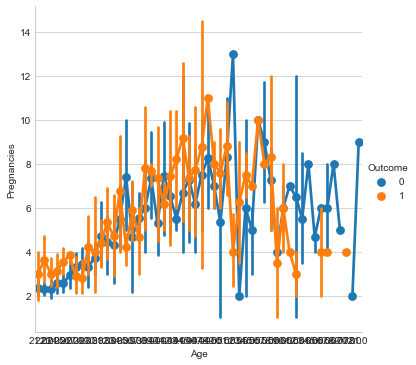

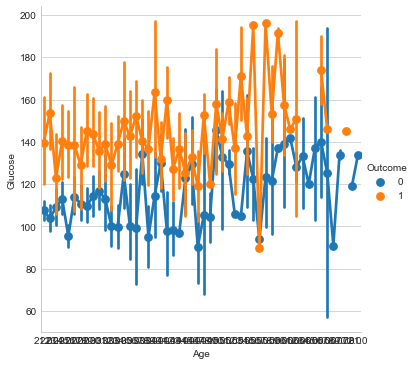

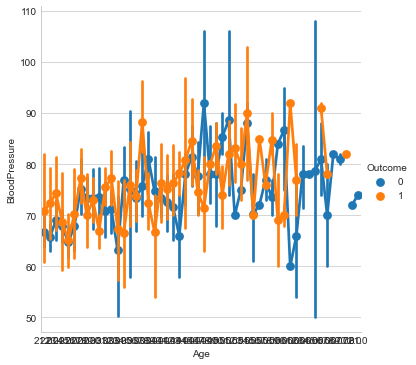

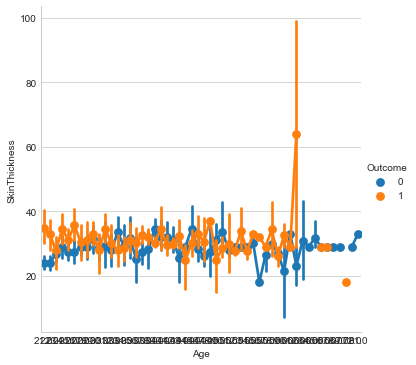

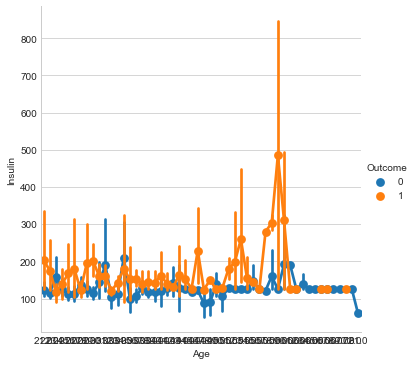

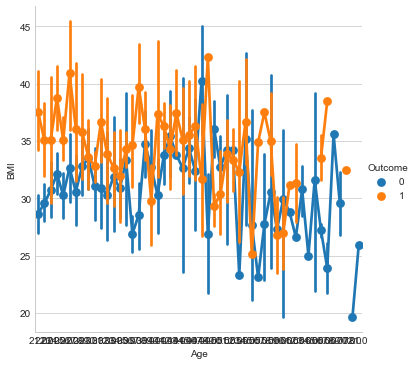

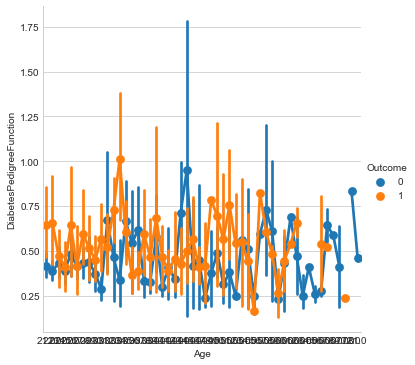

In [27]:
for i in X.columns[:-1]:
    sns.factorplot(x = "Age", y= i, hue= "Outcome", data = df)
    plt.show()

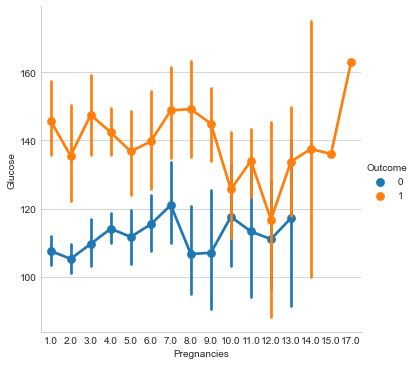

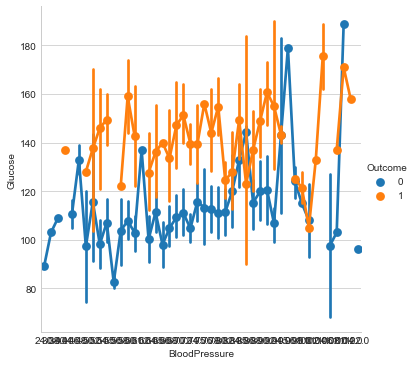

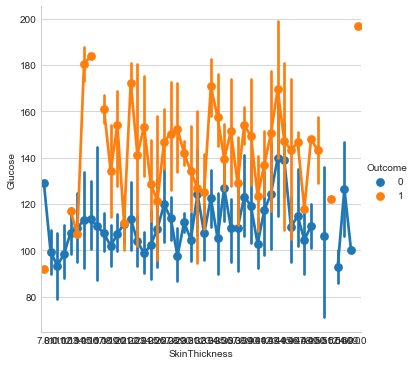

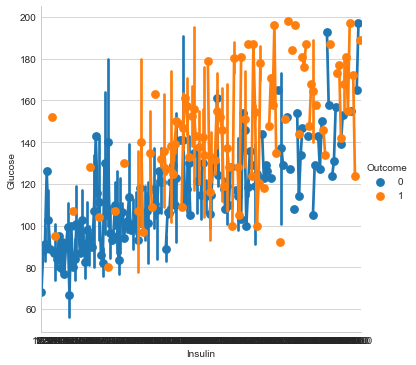

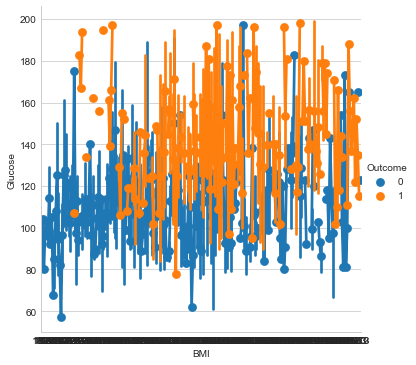

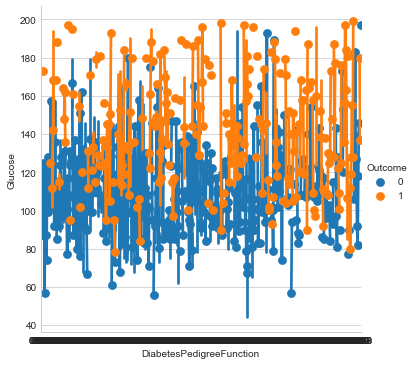

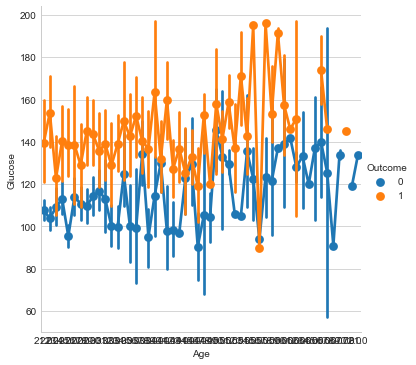

In [28]:
Ls=["Pregnancies",'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in Ls:
    sns.factorplot(x =i, y= "Glucose", hue= "Outcome", data = df)
    plt.show()

    * There are many ZEROS in features they correspond = NaN values.

## Train - Test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (614, 8)
X_test (154, 8)
y_train (614,)
y_test (154,)


In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [32]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [34]:
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_train_pred = log_model.predict(X_train)

In [35]:
print("log_model.coef_:",log_model.coef_,"\nlog_model.intercept_ :",log_model.intercept_)

log_model.coef_: [[ 0.43276068  1.08343991 -0.16398263  0.01521818 -0.06236522  0.62532097
   0.21638465  0.16726389]] 
log_model.intercept_ : [-0.86745003]


In [36]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

Precision quantifies the number of positive class predictions that actually belong to the positive class.
Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
F-Measure provides a single score that balances both the concerns of precision and recall in one number.

accuracy_score = R2_score

In [37]:
scr=[precision_score, recall_score, accuracy_score, f1_score]
for i in scr:
    print(i(y_train, y_train_pred))

0.727810650887574
0.5774647887323944
0.7785016286644951
0.643979057591623


In [38]:
for i in scr:
    print(i(y_test, y_pred))

0.7441860465116279
0.5818181818181818
0.7792207792207793
0.6530612244897959


In [39]:
print("f1_score(y_train, y_train_pred, average = weighted) \t :",f1_score(y_train, y_train_pred, average = "weighted"))
print("f1_score(y_test, y_pred, average = weighted)\t\t :",f1_score(y_test, y_pred, average = "weighted"))

f1_score(y_train, y_train_pred, average = weighted) 	 : 0.7715051828876553
f1_score(y_test, y_pred, average = weighted)		 : 0.7720116618075802


In [40]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,plot_roc_curve
confusion_matrix(y_test, y_pred)

array([[88, 11],
       [23, 32]], dtype=int64)

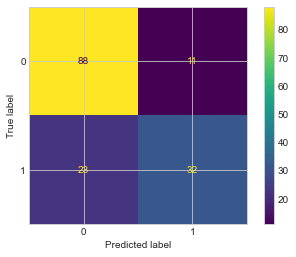

In [41]:
plot_confusion_matrix(log_model, X_test, y_test)

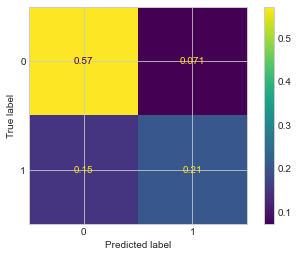

In [42]:
plot_confusion_matrix(log_model, X_test, y_test, normalize= "all")

In [43]:
# ROC Curve
plot_roc_curve(log_model, x_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

NameError: name 'x_test' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
model = LogisticRegression()

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv= 10)
print("Cross- validation mean of accuracy scores", scores.mean())
print("")
print(scores)

In [ ]:
scores = cross_val_score(model, X_test, y_test, cv= 10)
print("Cross- validation mean of accuracy scores", scores.mean())
print("")
print(scores)

In [ ]:
pd.options.display.float_format = "{:,.4f}".format
model = LogisticRegression()

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_weighted", "recall_weighted", 
                                                               "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index= range(1, 11))
df_scores

In [ ]:
df_scores.mean()[2:]

In [ ]:
model = LogisticRegression()

scores = cross_validate(model, X_test, y_test, scoring = ["accuracy", "precision_weighted", "recall_weighted", 
                                                               "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index= range(1, 11))
df_scores

In [ ]:
df_scores.mean()[2:]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
print(classification_report(y_train, y_train_pred))

# KNN

## Explaining Features and Determine Target Value

In [ ]:
df2.head()  # ZEROs converted to median 

In [ ]:
df2.Outcome.value_counts()

In [ ]:
colors = [ "green","purple"]
sns.countplot(df2.Outcome, palette= colors)
plt.show()

 *0 = not diabetics : ND
 

 *1 = diabetics : D
 
 
 

In [ ]:
ND= df[df2.Outcome == 0]
D= df[df2.Outcome == 1]

In [ ]:
plt.scatter(D.Age, D.Glucose, color= "red", label= "Bad")
plt.scatter(ND.Age, ND.Glucose, color= "green", label = "Good")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [ ]:
labels = ["Healthy","Diabetics"]
explode = [0, 0]
sizes = df2.Outcome.value_counts().values

plt.figure(figsize= (7, 7))
plt.pie(sizes, explode= explode, labels= labels, autopct = "%1.1f%%",)
plt.title("Percentage of diagnosis diabetics", color = "orange", fontsize = 20)
plt.show()

## Correlation in Data

In [ ]:
corr = df2.corr().Outcome
corr[np.argsort(corr, axis= 0)[:-1]]

## Scaling and Categorizing Data Features

In [ ]:
y = df2.Outcome
x = df2.drop(columns = "Outcome")

In [ ]:
x.head()

In [ ]:
x.columns

In [ ]:
y.head()

In [ ]:
from sklearn.preprocessing import Normalizer
x = Normalizer().fit_transform(x)
x=pd.DataFrame(x,columns=df2.columns[:-1])
x

In [ ]:
for i in x:
    g = sns.distplot(x[i], color = "b", label = "Skewness : %.2f"%(x[i].skew()))
    g = g.legend(loc = "best")
    plt.show()

## Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [ ]:
print("x_train: {}\nx_test: {}\ny_train: {}\ny_test: {}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

## Modeling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

In [ ]:
y_pred

In [ ]:
#   p <= %50 = 0,  p > %50 = 1 

In [ ]:
y_pred_proba = knn_model.predict_proba(x_test)
y_pred_proba

In [ ]:
pd.DataFrame(y_pred_proba).sample(10)

In [ ]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Pred_proba": y_pred_proba[:,1]}
pd.DataFrame.from_dict(my_dict).sample(20)

## Model Performance on Classification Tasks

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
plot_confusion_matrix(knn_model, x_test, y_test);

In [ ]:
plot_confusion_matrix(knn_model, x_test, y_test, normalize= "all")

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
y_train_pred = knn_model.predict(x_train)
print(classification_report(y_train, y_train_pred))

## Elbow Method for Choosing Reasonable K Values

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
test_error_rates = []
for k in range(20, 50):
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(x_train, y_train)
    
    y_pred_test = knn_model.predict(x_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)


In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(range(20,50), test_error_rates, color = "blue", linestyle = "--", marker = "o",
         markerfacecolor= "red", markersize= 10)
plt.title("Error Rate vs K-Values")
plt.xlabel("K_values")
plt.ylabel("Error Rate")
plt.hlines(y= 0.34, xmin= 20, xmax= 50,colors = "r", linestyles= "--")
plt.hlines(y= 0.32, xmin= 20, xmax= 50,colors = "r", linestyles= "--")
plt.show()

## Scores by Various K Values

In [ ]:
# k = 1
knn = KNeighborsClassifier(n_neighbors= 28)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print("TEST")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

In [ ]:

knn = KNeighborsClassifier(n_neighbors= 45)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print("TEST")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

## Cross Validate For Optimal K Value

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
model = KNeighborsClassifier(n_neighbors= 45)

scores = cross_validate(model, x_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)


In [ ]:
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

In [ ]:
df_scores.mean()[2:]

## Gridseach Method for Choosing Reasonable K Values

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_grid = KNeighborsClassifier()

In [ ]:
k_values = range(1, 50)

In [ ]:
param_grid = {"n_neighbors": k_values, "weights": ["uniform", "distance"]}

In [ ]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv= 10, scoring = "accuracy")

In [ ]:
knn_grid_model.fit(x_train, y_train)

In [ ]:
knn_grid_model.best_estimator_

In [ ]:

knn = KNeighborsClassifier(n_neighbors= 45)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print("TEST")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 45)

knn.fit(x_train, y_train)
pred = knn.predict(x_train)

print("TRAIN")
print("\n")
print(confusion_matrix(y_train, pred))
print("\n")
print(classification_report(y_train, pred))